# Prosper Loan Data
### by Abdullah Elsayed
> Prosper is a peer-to-peer lending platform that aims to connect people who need money with those people who have the money to invest. In this data analysis project, I have explored the Prosper dataset, prepare it for analysis and used 'Pyplot and Seaborn' to create my visualization and communicate results.

> Questions to answer
    - Dose higher Credit Rate affect ....
    
> Feature needed for analysis
    ListingCreationDate - CreditGrade - Term - LoanStatus -BorrowerAPR -BorrowerRate - LenderYield - EstimatedEffectiveYield - 
    
### The project workflow

<ul>
<li><a href="#intro">Take a look at the data</a></li>
<li><a href="#understand">Data Understanding</a></li>
<li><a href="#prepare">Data Preparation</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conc">Conclusions</a></li>
</ul>

#### Import all packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mo

#### Load data and show first 5 rows

In [2]:
df = pd.read_csv('prosperLoanData.csv')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

<a id='understand'></a>
## Data Understanding

Let's Take a look at Stracture of data

In [3]:
shape = df.shape
print(f"data contains {shape[0]} Rows, And {shape[1]} Variable")

data contains 113937 Rows, And 81 Variable


What is The time duration of the data?

In [4]:
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])
print(f"Start date is : {df['ListingCreationDate'].dt.year.min()}")
print(f"End date is : {df['ListingCreationDate'].dt.year.max()}")

Start date is : 2005
End date is : 2014


What is CreditGrade unique values ?

In [5]:
df['CreditGrade'].unique()

array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

In [6]:
df['CreditGrade'].value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

     -Sort From lower Risk to Higher Risk ==> AA, A, B, C, D, E, HR
     -When i checked Prosper website i didn't found any cerdit grade NC So i will assign them to NaN in preparation phase

Now i will Examine Missing values and Dtypes

In [7]:
## Check Missing values and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   object        
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

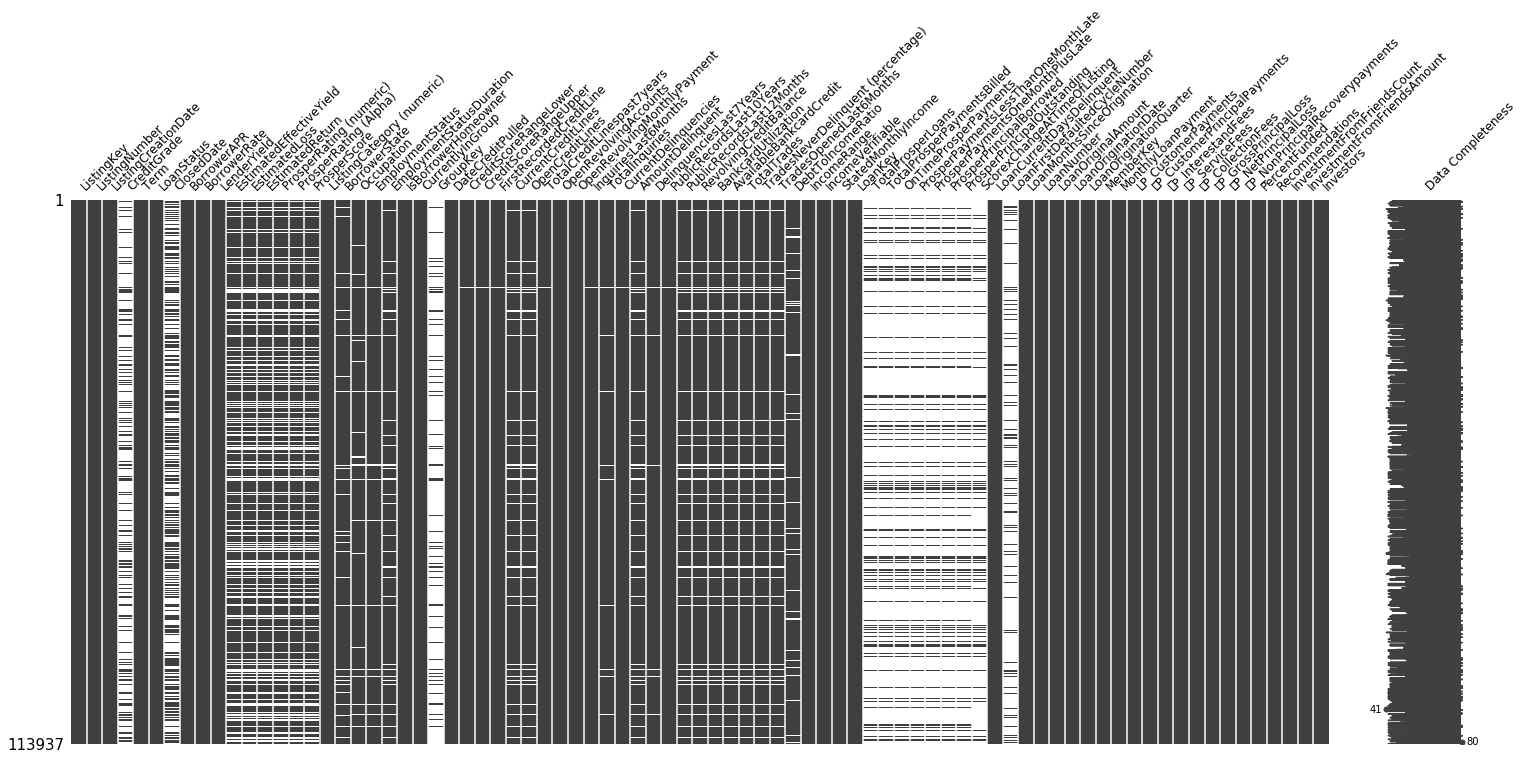

In [8]:
## Take a look at distribution of Missing values
mo.matrix(df, labels=True, fontsize=12)
plt.show()

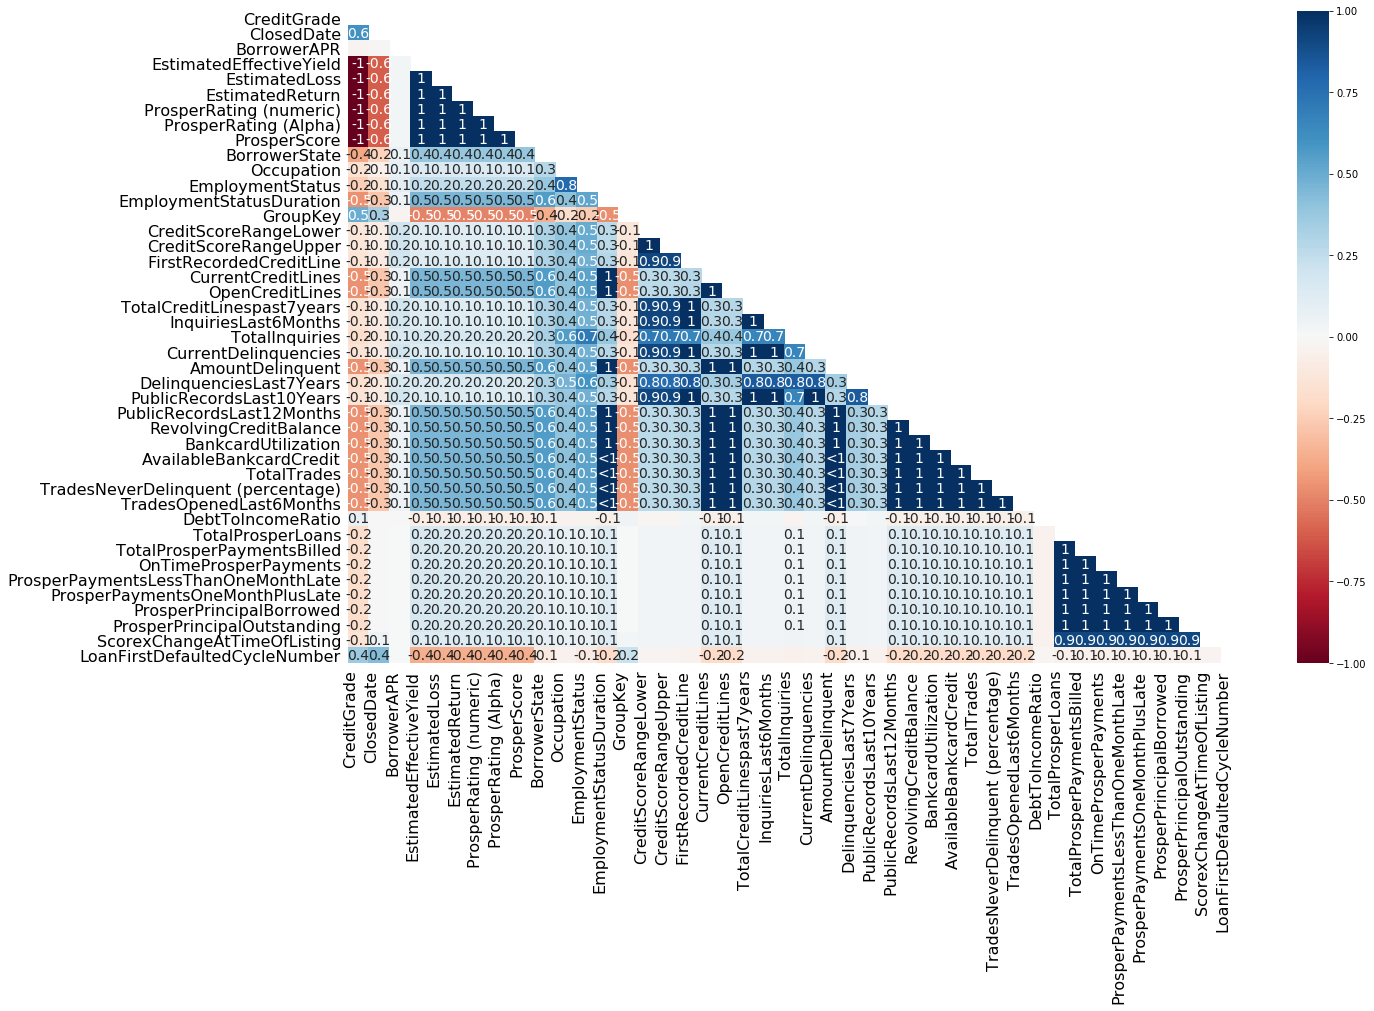

In [9]:
## Find Colleration between Missingness
mo.heatmap(df)
plt.xticks(rotation=90)
plt.show()

<a id='prepare'></a>

## Data Preparation

#### Data Cleaning

In [10]:
## Assign NC value to NaN
df['CreditGrade'] = df['CreditGrade'].replace('NC',np.nan)

## Impute missing values in CreditGrade to 'Unknown'
df['CreditGrade'] = df['CreditGrade'].fillna('unknown')
df['CreditGrade'].isna().sum()

0

In [11]:
# impute Missing in BorrowerAPR by midean of difference between BorrowerAPR and BorrowrRate
bor_fees = df["BorrowerAPR"] - df["BorrowerRate"]
med = bor_fees.median()

df['BorrowerAPR'] = df['BorrowerAPR'].fillna(df["BorrowerRate"] + med)
df["BorrowerRate"].isna().sum()

0

In [12]:
## impute missing values EstimatedEffectiveYield by Midean of difference between BorrowerRate and EstimatedEffectiveYield
## Beacause the eqution of EstimatedEffectiveYield is Borrowe interest rate minus any servicees fee rate and loss
fees_loss = df['BorrowerRate'] - df['EstimatedEffectiveYield']
med = fees_loss.median()

df['EstimatedEffectiveYield'] =  df['EstimatedEffectiveYield'].fillna(df['BorrowerRate'] - med)
df['EstimatedEffectiveYield'].isna().sum()

0

In [13]:
## impute Estimated Loss by median.
## Beacause Estimated loss is the estimated principal loss on charge-offs
df['EstimatedLoss'] = df['EstimatedLoss'].fillna(df['EstimatedLoss'].median())
df['EstimatedLoss'].isna().sum()

0

In [14]:
## impute estimated Return by Estimated Effective Yield Minus the Estimated Loss Rate
## Beacause Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate
df['EstimatedReturn'] = df['EstimatedReturn'].fillna(df['EstimatedEffectiveYield'] - df['EstimatedLoss'])
df['EstimatedReturn'].isna().sum()

0

In [15]:
## The values of ProsperRating (numeric) between 1 and 10 so we can impute missing by median
df["ProsperRating (numeric)"] = df["ProsperRating (numeric)"].fillna(df["ProsperRating (numeric)"].median())
df["ProsperRating (numeric)"].isna().sum()

0

In [16]:
## Examine ProsperRating (Alpha) and ProsperRating (numeric)
df['ProsperRating (numeric)'].value_counts()

4.0    47429
5.0    15581
6.0    14551
3.0    14274
2.0     9795
1.0     6935
7.0     5372
Name: ProsperRating (numeric), dtype: int64

In [17]:
## since AA,A,B,C,D,E,HR values in ProsperRating (Alpha) = 1.0, 2.0,..., 7.0 in ProsperRating (numeric)
ProsperRating = df[df['ProsperRating (Alpha)'].isna()][['ProsperRating (numeric)','ProsperRating (Alpha)']]
ProsperRating['ProsperRating (Alpha)'] = ProsperRating['ProsperRating (numeric)']
ProsperRating['ProsperRating (Alpha)'].value_counts()

4.0    29084
Name: ProsperRating (Alpha), dtype: int64

In [18]:
## So we can impute Nan Values in this column to C
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].fillna('C')
df['ProsperRating (Alpha)'].isna().sum()

0

In [19]:
## impute ProsperScore by median
df["ProsperScore"] = df["ProsperScore"].fillna(df["ProsperScore"].median())
df["ProsperScore"].isna().sum()

0

In [20]:
# impute missing values in BorrowerState to 'unknown'
df[['BorrowerState','Occupation', 'EmploymentStatus','ClosedDate']] = df[['BorrowerState','Occupation', 'EmploymentStatus','ClosedDate']].fillna('unknown')
df[['BorrowerState','Occupation', 'EmploymentStatus','ClosedDate']].isna().sum()

BorrowerState       0
Occupation          0
EmploymentStatus    0
ClosedDate          0
dtype: int64

In [21]:
## values is null in those variables if the borrower had no prior loans so we will impute them to zero

df[['TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding']] = df[['TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding']].fillna(0)
df[['TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding']].isna().sum()

TotalProsperLoans                      0
TotalProsperPaymentsBilled             0
OnTimeProsperPayments                  0
ProsperPaymentsLessThanOneMonthLate    0
ProsperPaymentsOneMonthPlusLate        0
ProsperPrincipalBorrowed               0
ProsperPrincipalOutstanding            0
dtype: int64

In [22]:
## i need EmploymentStatusDuration variable in alysis and it have low null values
## also There is high correlation between it and another variables needed
## so i will dropna in this variable

df.dropna(subset=['EmploymentStatusDuration'],inplace=True)
df['EmploymentStatusDuration'].isna().sum()

0

In [23]:
## New shape of data after drop null values in EmploymentStatusDuration
new_shape = df.shape
print(f"shape of data after drop null values is '{new_shape[0]}' Rows, And '{new_shape[1]}' Variable")

shape of data after drop null values is '106312' Rows, And '81' Variable


In [24]:
## because ScorexChangeAtTimeOfListing relies on a history of borrowing with Prosper, most loans are missing a value here
## So we will impute missing to 0.
df['ScorexChangeAtTimeOfListing'] = df['ScorexChangeAtTimeOfListing'].fillna(0)
df['ScorexChangeAtTimeOfListing'].isna().sum()

0

In [25]:
## LoanFirstDefaultedCycleNumber and Group Key not needed in alysis so i will drop them
df.drop(['LoanFirstDefaultedCycleNumber','GroupKey'], axis=1, inplace=True)

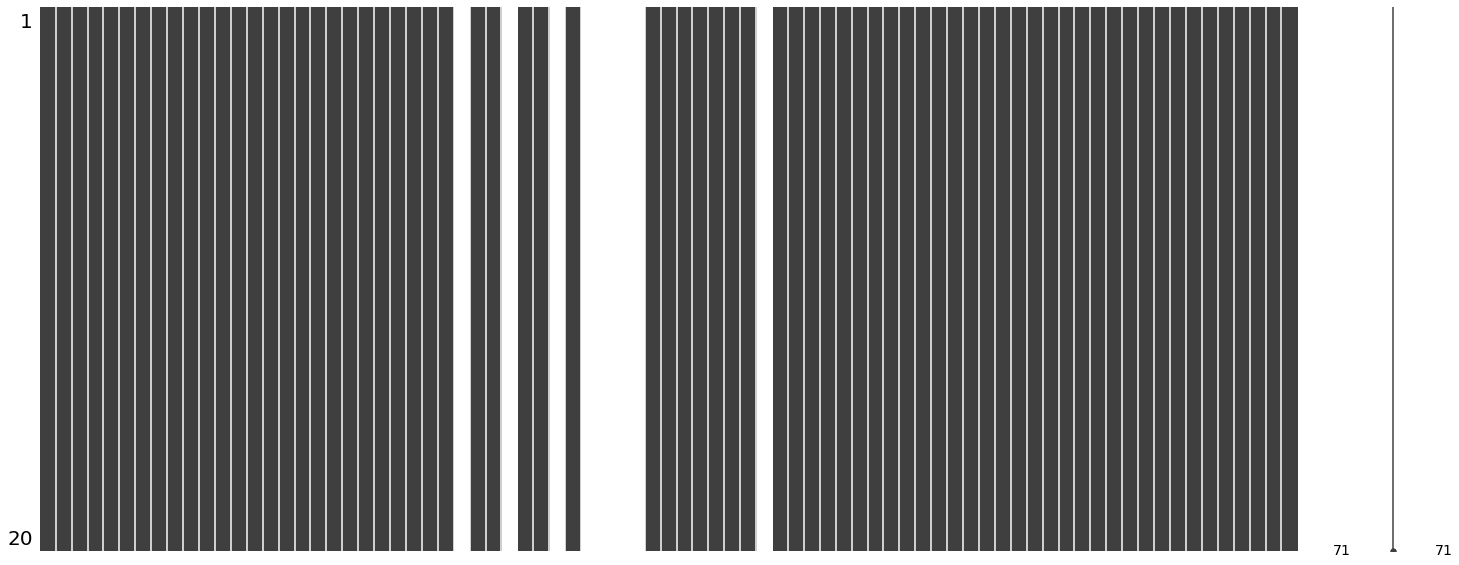

In [26]:
examine_corr = df[df['FirstRecordedCreditLine'].isna()]
mo.matrix(examine_corr)

In [27]:
## based on previous matrix when i drop missing values in FirstRecordedCreditLine, another columns will affected
## So i will drop null values
df.dropna(subset=['FirstRecordedCreditLine','BankcardUtilization'], inplace=True)

In [28]:
# Ecamine Nullity again    EmploymentStatusDuration CreditScoreRangeLower CreditScoreRangeUpper
df.isna().sum()

ListingKey                                0
ListingNumber                             0
ListingCreationDate                       0
CreditGrade                               0
Term                                      0
LoanStatus                                0
ClosedDate                                0
BorrowerAPR                               0
BorrowerRate                              0
LenderYield                               0
EstimatedEffectiveYield                   0
EstimatedLoss                             0
EstimatedReturn                           0
ProsperRating (numeric)                   0
ProsperRating (Alpha)                     0
ProsperScore                              0
ListingCategory (numeric)                 0
BorrowerState                             0
Occupation                                0
EmploymentStatus                          0
EmploymentStatusDuration                  0
IsBorrowerHomeowner                       0
CurrentlyInGroup                

### Examine Duplicates

In [29]:
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis
<ul>
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#bi">Bivariate Exploration</a></li>
<li><a href="#multi">Multivariate Exploration</a></li>
</ul>

<a id='uni'></a>
### Univariate Exploration

The Variables i interset to use in this Exploration is :- 

[CreditGrade - Term - BorrowerRate - BorrowerState - Occupation	- EmploymentStatus - IncomeRange - StatedMonthlyIncome - Investors - LoanOriginalAmount-ListingCategory]

##### Q1 : Distribution of ListingCategory (numeric)

The category of the listing that the borrower selected when posting their listing: 
0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 
6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 
13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 
19 - Vacation, 20 - Wedding Loans

In [30]:
## Adding new Columns "ListingCategory (alpha)"
num = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
alpha = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases', 'Medical/Dental','Motorcycle','RV','Taxes', 'Vacation', 'Wedding Loans']

df['ListingCategory (alpha)'] = df['ListingCategory (numeric)'].replace(num, alpha)

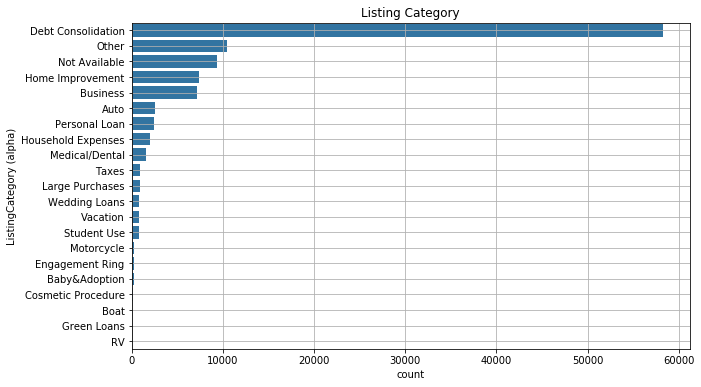

In [31]:

## Plot Count of categories
lc = df['ListingCategory (alpha)'].value_counts()
plt.figure(figsize=[10,6])
base_color = sns.color_palette()[0]
ax = sns.countplot(data=df, y='ListingCategory (alpha)', color=base_color, order=lc.index)
plt.grid()
plt.title('Listing Category')
plt.show()

There are about 60000 Loan with category Debt Consolidation, While all ather categories under 10000 loan

#### Now The question is what porpotion of loan amounts in this category ? 

In [32]:
dc = df[df['ListingCategory (alpha)'] == 'Debt Consolidation']

In [33]:
dc['LoanOriginalAmount'].sum() / df['LoanOriginalAmount'].sum() * 100

63.43081772363688

63% of the money goes into the debt conolidation

#### Q2: What is The Most Term of loan use

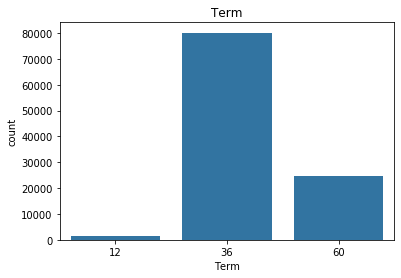

In [34]:
term = df['Term']
ax = sns.countplot(data=df,x='Term', color=base_color)
plt.title('Term')
plt.show()

In [35]:
term.value_counts()

36    80133
60    24543
12     1614
Name: Term, dtype: int64

The Most Term of loan is 36 Month, There are 80133 Loan with This Term

#### Now what is the porpotion of Terms

In [36]:
ter_po = df.groupby('Term')['Term'].count()
ter_po

Term
12     1614
36    80133
60    24543
Name: Term, dtype: int64

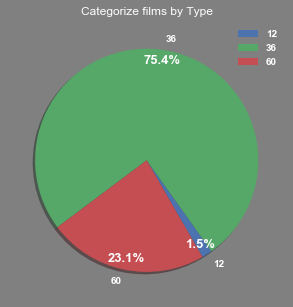

In [37]:

plt.style.use('seaborn')
plt.rcParams['text.color'] = 'w'
plt.rcParams['font.weight'] = 700
plt.rcParams['font.size'] = 13.0
fig, ax = plt.subplots(figsize=(5,10))
explode = (0.1,0,0.2) 
ax.pie(ter_po, labels=ter_po.index, shadow=True,autopct='%1.1f%%', startangle=-60, pctdistance=0.90)
fig.set_facecolor('grey')
ax.set_title('Categorize films by Type')
plt.legend()
plt.show()

There are about 75.4% Loans with term 36 Month and 23.1% with term 60 month, and 1.5% with term 12 Month

#### Q3: What is Average of borrower Rate

First, We wll check the distribution of Borrower Rate

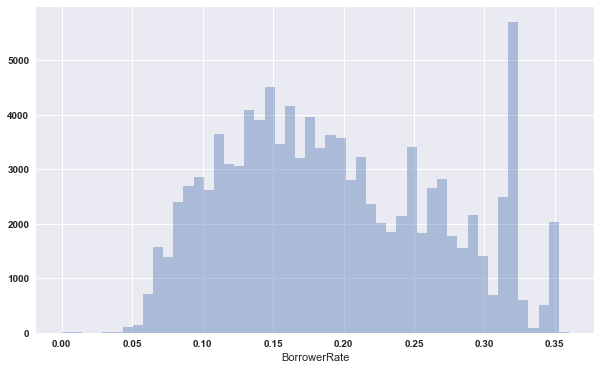

In [38]:
plt.figure(figsize=[10,6])
sns.distplot(df['BorrowerRate'], kde=False);

The interval of Borrower Rate is between 0.03% and 0.35, and we can't assume there are outliers

##### Now, Compute The average of Borrower Rate

In [39]:
borr_avg = df['BorrowerRate'].mean()
print(f"The Average of Borrower Rate is {round(borr_avg,2)}%")

The Average of Borrower Rate is 0.19%


#### Q3: What is Average of Loan Original Amount 

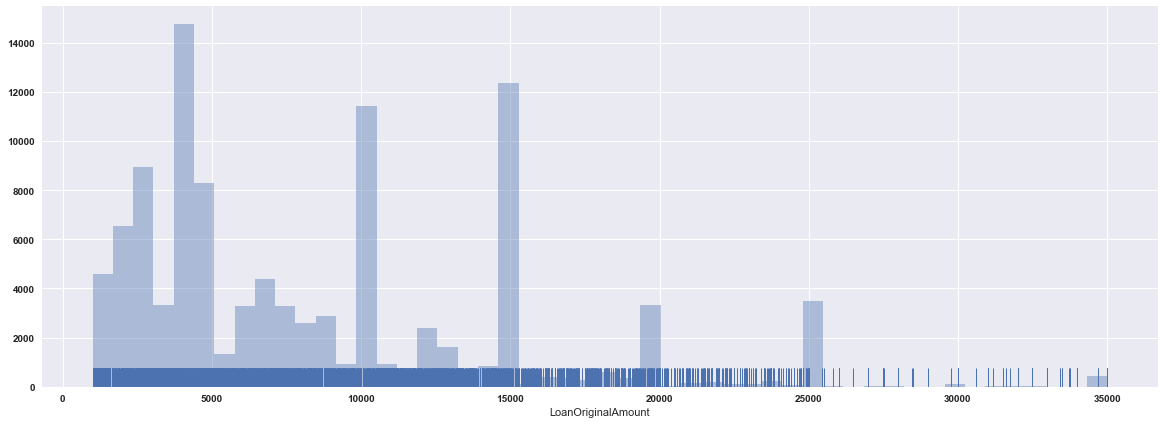

In [40]:
plt.figure(figsize=[20,7])
sns.distplot(df['LoanOriginalAmount'], kde=False, rug=True)
plt.show()

In [41]:
df['LoanOriginalAmount'].min(), df['LoanOriginalAmount'].max()

(1000, 35000)

Most loan values range from 1000 to 35000 , but only a few people ask for loans above 20000

#### Q4: What are the states that request loans the most ?


In [42]:
bs_c = df['BorrowerState'].value_counts()

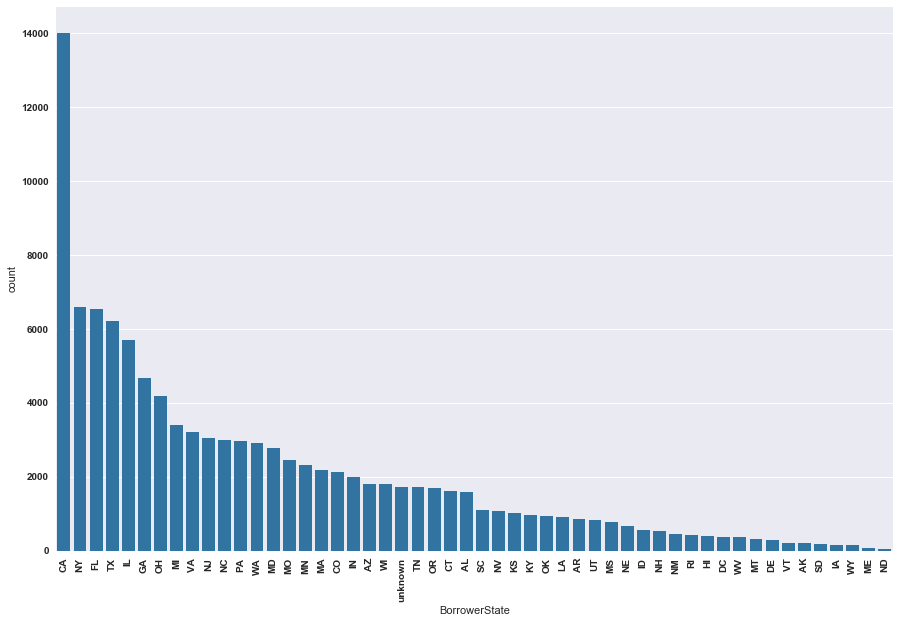

In [43]:
plt.figure(figsize=[15,10])
sns.countplot(data=df, x= 'BorrowerState', color=base_color, order=bs_c.index)
plt.xticks(rotation=90)
plt.show()

- CA is highst state ask for loans, Then NY, FL, TX, 
- The Lowest states ask for loans is ND, ME, WY, IA

#### Q4: does all loans completely funded ?

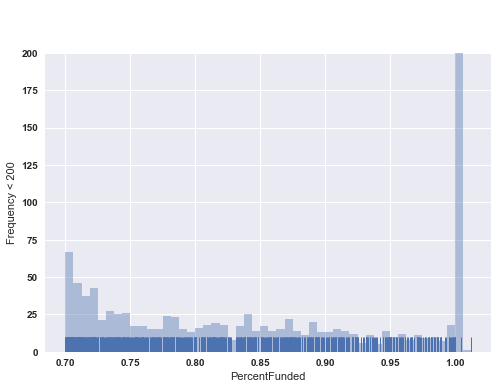

In [44]:
## plot a histogram for percentFunded
g = sns.distplot(df['PercentFunded'], kde=False, rug=True)
g.set_title("Title",fontsize=50)
g.set_ylabel("Frequency < 200")
plt.ylim((0,200))
plt.show()

The majority of the loans were fully funded and a very small percentage of the loans were funded by more than 70% of their original value

#### Let's Take a Look at some statistics

In [45]:
## show summary statistics
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.062900e+05,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,1.062900e+05,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,97886.000000,1.062900e+05,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000,106290.000000
mean,6.694724e+05,41.177307,0.220235,0.192984,0.182861,0.167284,0.078709,0.094728,4.057729,5.960119,2.972820,96.083733,691.243767,710.243767,10.318647,9.261445,27.048339,7.176188,412.889425,1.295418,5.256769,0.456948,984.616314,3.924772,0.302173,0.015100,1.759642e+04,0.561368,11212.791147,23.235177,0.885994,0.802465,0.276031,5.671272e+03,0.295230,4.764390,4.626766,0.127491,0.010086,1760.259758,608.803974,-0.571775,131.439486,27.765161,74144.614291,8567.463929,279.048536,4148.129513,3063.467135,1084.662378,-56.700149,-13.870394,648.440549,630.127995,23.766643,0.998482,0.051312,0.025045,17.659759,81.410904
std,2.991126e+05,10.721237,0.080911,0.075209,0.074978,0.070168,0.041898,0.043809,1.495117,2.123270,4.065411,94.481719,56.409834,56.409834,5.456756,5.021749,13.576977,4.574231,446.895128,2.137133,5.693925,1.572077,7159.064473,9.799201,0.702691,0.154123,3.291834e+04,0.317887,19821.092529,11.868873,0.147969,1.097709,0.524563,7.607880e+03,0.673561,12.788892,12.462354,1.142762,0.254330,4814.502837,2103.357287,21.158026,424.069391,26.591665,35973.077531,6266.515570,192.185573,4753.129076,4043.990398,1183.921035,61.729528,109.485216,2333.082282,2301.239280,270.035864,0.018548,0.343594,0.240335,304.586222,104.881307
min,9.827900e+04,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,520.000000,539.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,7495.000000,1000.000000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.662092e+05,36.000000,0.157130,0.133400,0.123400,0.114770,0.052000,0.0

When i Examine summary statistics i found somthing strange in investor variable, That max value is 1189 so i will Examine this variable

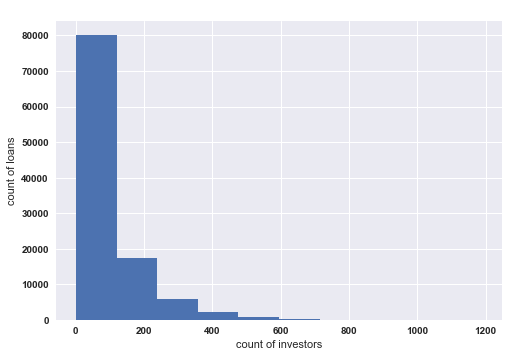

In [46]:
## Plot histogram of investor
plt.hist(df['Investors'])
plt.title('Count of Investors per loan')
plt.xlabel('count of investors')
plt.ylabel('count of loans')
plt.show()


The histogram shows that loans funded by more than 500 investor are outliers, and The most is funded by lower then 200 invstor.

The outliers here dosn't affect the analysis so i will keep it

#### The minimum value of MonthlyLoanPayment is 0 So i will Examine it too

In [47]:
df[df['MonthlyLoanPayment'] <20]['MonthlyLoanPayment'].count()

941

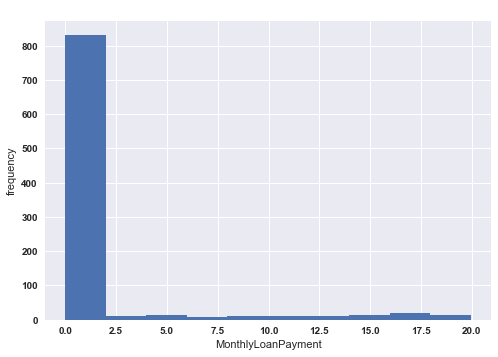

In [48]:
plt.hist(df[df['MonthlyLoanPayment'] <20]['MonthlyLoanPayment'])
plt.title('MonthlyLoanPayment')
plt.xlabel('MonthlyLoanPayment')
plt.ylabel('frequency')
plt.show()

i think those values of MonthlyLoanPayment which lower then 20 is missy data so i will assign them to 20

In [49]:
df['MonthlyLoanPayment'].loc[df['MonthlyLoanPayment'] < 20] = 20

/home/abdullah/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


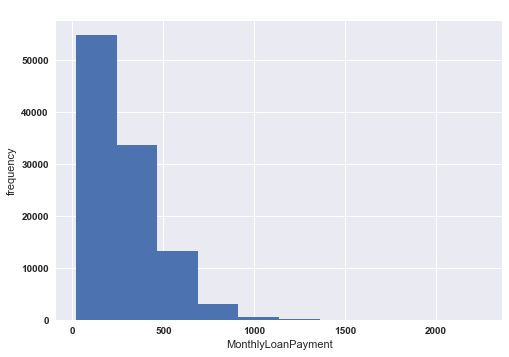

In [50]:
## Plot histogram again
plt.hist(df[df['MonthlyLoanPayment'] > 20]['MonthlyLoanPayment'])
plt.title('MonthlyLoanPayment')
plt.xlabel('MonthlyLoanPayment')
plt.ylabel('frequency')
plt.show()

### Q5: There is very important Question, What is the total Value of the loan.
i assume to compute it by Term * MonthlyLoanPayment

In [51]:
## add new variable for total value of the loan
df['loanTotalValue'] = df['Term'] * df['MonthlyLoanPayment']

In [52]:
## The Average of total value of loans
df['loanTotalValue'].mean()

11657.734316679938

#### Notice: The minimum value of MonthlyLoanPayment is 0 So i will Examine it too

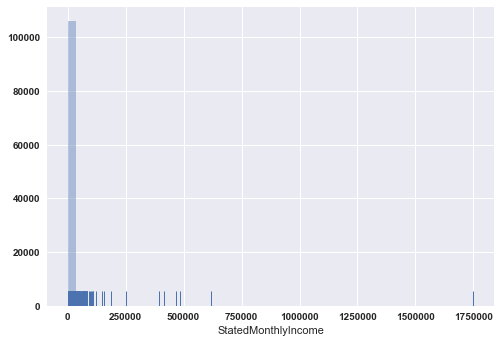

In [53]:
sns.distplot(df['StatedMonthlyIncome'], kde=False, rug=True)
plt.show()

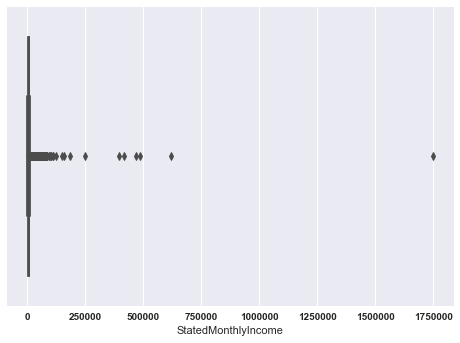

In [54]:
sns.boxplot(df['StatedMonthlyIncome'])
plt.show()

In [55]:
df['StatedMonthlyIncome'].median() , df['StatedMonthlyIncome'].mean()

(4750.0, 5671.271972122044)

In [56]:
## Remove Outliers
df['StatedMonthlyIncome'] = df['StatedMonthlyIncome'][df['StatedMonthlyIncome'].between(df['StatedMonthlyIncome'].quantile(.15), df['StatedMonthlyIncome'].quantile(.85))] # without outliers


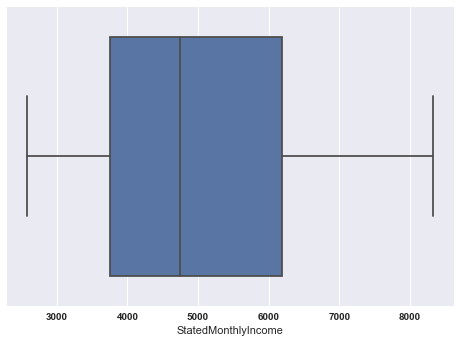

In [57]:
## Examine after remove outliers
sns.boxplot(df['StatedMonthlyIncome'])
plt.show()

## Conclusions
    
    - There are about 60000 Loan with category Debt Consolidation, While all ather categories under 10000 loan
    - 63% of the money goes into the debt conolidation
    - The Most Term of loan is 36 Month, There are 80133 Loan with This Term
    - There are about 75.4% Loans with term 36 Month and 23.1% with term 60 month, and 1.5% with term 12 Month
    - The interval of Borrower Rate is between 0.03% and 0.35, and we can't assume there are outliers
    - Most loan values range from 1000 to 35000 , but only a few people ask for loans above 20000
    - CA is highst state ask for loans, Then NY, FL, TX, 
    - The Lowest states ask for loans is ND, ME, WY, IA
    - The majority of the loans were fully funded and a very small percentage of the loans were funded by more than 70% of their original value
    
    - The histogram shows that loans funded by more than 500 investor are outliers, and The most is funded by lower then 200 invstor. but The outliers here dosn't affect the analysis so i will keep it

<a id='bi'></a>

### Bivariate Exploration

#### Q6: What is The Relationship Between loanTotalValue and LoanOriginalAmount ? 

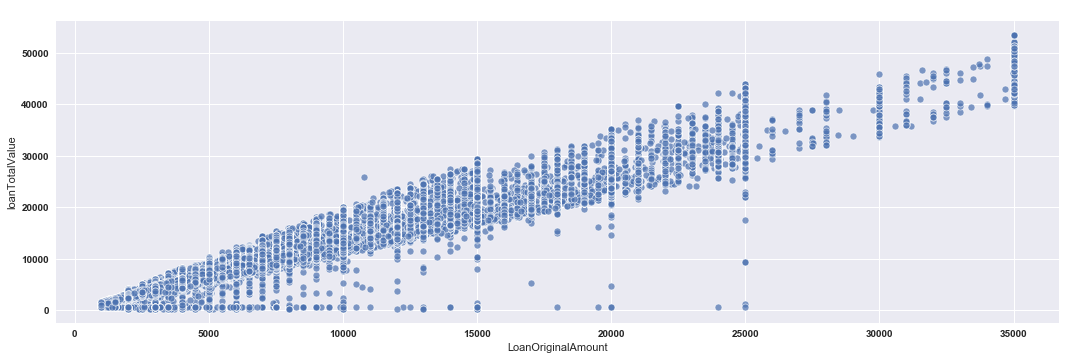

In [60]:
sns.relplot(data=df, x='LoanOriginalAmount', y='loanTotalValue',kind='scatter', height=5, aspect =3, alpha=0.7)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('loanTotalValue')
plt.title(' loanTotalValue vs LoanOriginalAmoun')
plt.show()

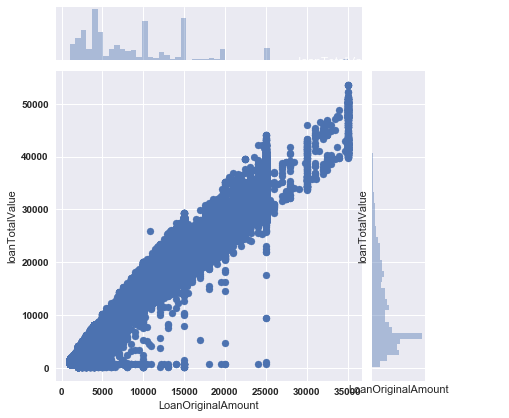

In [62]:
sns.jointplot(data=df, x='LoanOriginalAmount', y='loanTotalValue')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('loanTotalValue')
plt.title(' loanTotalValue vs LoanOriginalAmoun')
plt.show()

### Q7: What is Relationship between stated monthly income and percent funded

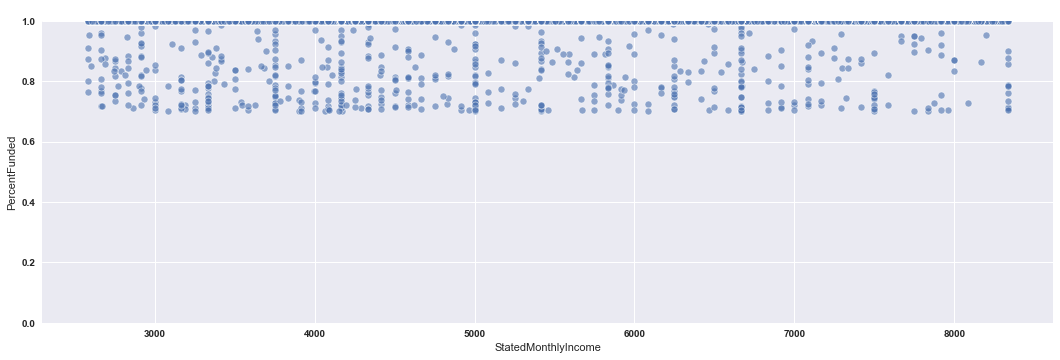

In [59]:
sns.relplot(data=df, x='StatedMonthlyIncome', y='PercentFunded',kind='scatter', height=5, aspect =3, y_jitter=0.9, alpha=0.6)
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('PercentFunded')
plt.title('StatedMonthlyIncome vs PercentFunded')
plt.ylim((0,1))
plt.show()

<a id='multi'></a>

### Multivariate Exploration

In [ ]:
df.columns

<a id='conc'></a>

## Conclusion 